8.IMPLEMENT A NEURAL NETWORK FOR BINARY CLASSIFICATION AND TEST DIFFERENT ACTIVATION FUNCTIONS LIKE ReLU, SIGMOID AND Tanh.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)



Training Neural Network with sigmoid activation:
Epoch 0: Loss = 0.7003
Epoch 100: Loss = 0.6786
Epoch 200: Loss = 0.6021
Epoch 300: Loss = 0.4503
Epoch 400: Loss = 0.3589
Epoch 500: Loss = 0.3239
Epoch 600: Loss = 0.3098
Epoch 700: Loss = 0.3034
Epoch 800: Loss = 0.3003
Epoch 900: Loss = 0.2986
Test Accuracy (sigmoid): 85.50%

Training Neural Network with tanh activation:
Epoch 0: Loss = 0.6985
Epoch 100: Loss = 0.3328
Epoch 200: Loss = 0.3063
Epoch 300: Loss = 0.3054
Epoch 400: Loss = 0.3055
Epoch 500: Loss = 0.3054
Epoch 600: Loss = 0.3053
Epoch 700: Loss = 0.3051
Epoch 800: Loss = 0.3050
Epoch 900: Loss = 0.3048
Test Accuracy (tanh): 86.50%

Training Neural Network with relu activation:
Epoch 0: Loss = 0.6960
Epoch 100: Loss = 0.4650
Epoch 200: Loss = 0.3488
Epoch 300: Loss = 0.3199
Epoch 400: Loss = 0.3077
Epoch 500: Loss = 0.3009
Epoch 600: Loss = 0.2968
Epoch 700: Loss = 0.2941
Epoch 800: Loss = 0.2923
Epoch 900: Loss = 0.2911
Test Accuracy (relu): 86.50%


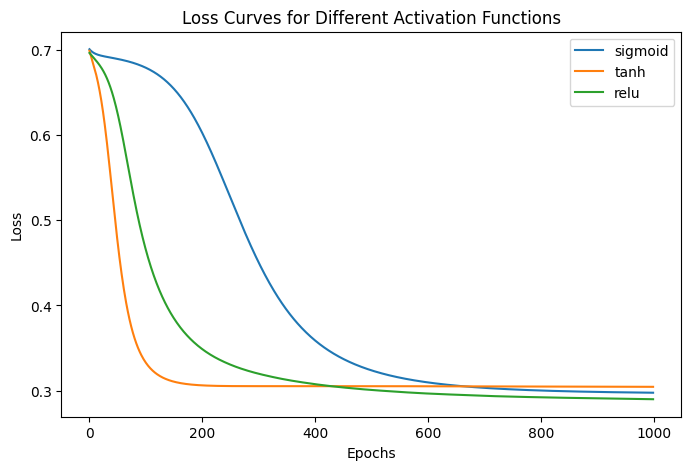

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, activation='sigmoid', lr=0.01): # Changed _init_ to __init__
        np.random.seed(42)
        self.lr = lr
        self.activation_name = activation
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros((1, 1))

        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Activation function must be 'sigmoid', 'tanh', or 'relu'")

    # ... (rest of the class code remains the same)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)  # Output layer uses sigmoid (for binary classification)
        return self.A2

    def backward(self, X, y):
        m = X.shape[0]
        dZ2 = self.A2 - y
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.activation_derivative(self.A1)
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

    def train(self, X, y, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)
            self.backward(X, y)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

        return loss_history

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Train models with different activation functions
activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for act in activations:
    print(f"\nTraining Neural Network with {act} activation:")
    nn = NeuralNetwork(input_size=2, hidden_size=5, activation=act, lr=0.1)
    histories[act] = nn.train(X_train, y_train, epochs=1000)

    # Evaluate accuracy
    y_pred_test = nn.predict(X_test)
    accuracy = np.mean(y_pred_test == y_test) * 100
    print(f"Test Accuracy ({act}): {accuracy:.2f}%")

# Plot loss curves
plt.figure(figsize=(8, 5))
for act in activations:
    plt.plot(histories[act], label=f'{act}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for Different Activation Functions')
plt.show()